# Dike Model Analysis

In [1]:
# import libraries
from ema_workbench import load_results
from ema_workbench.analysis import plotting, plotting_util, pairs_plotting
from ema_workbench.analysis import prim

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

## Scenario discovery with PRIM

### Problem Framing 2

In [2]:
# import data
experiments, outcomes = load_results('./results/prim_problem2.tar.gz')

In [3]:
# show experiments
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,117,137.695820,10.0,0.192255,181.288824,1.0,0.885969,224.705726,1.5,0.671473,...,0,0,0,0,0,0,0,0,Policy 0,dikesnet
1,7,296.945200,1.0,0.796338,126.095034,1.5,0.994529,101.994811,10.0,0.280376,...,0,0,0,0,0,0,0,1,Policy 0,dikesnet
2,54,214.418537,1.0,0.717056,347.720702,1.5,0.242277,287.327219,1.0,0.224819,...,0,0,0,0,0,0,0,2,Policy 0,dikesnet
3,55,298.602184,1.0,0.574311,312.904714,1.5,0.382604,205.254117,1.0,0.937788,...,0,0,0,0,0,0,0,3,Policy 0,dikesnet
4,14,232.990579,10.0,0.256071,55.118163,1.0,0.492966,288.942315,10.0,0.542156,...,0,0,0,0,0,0,0,4,Policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,28,181.372720,1.5,0.586355,231.299909,1.5,0.268159,30.707375,1.5,0.080432,...,0,0,0,0,0,0,0,4995,Policy 0,dikesnet
4996,71,226.490831,10.0,0.446196,278.630251,1.5,0.763019,298.223605,10.0,0.411942,...,0,0,0,0,0,0,0,4996,Policy 0,dikesnet
4997,94,66.874774,1.0,0.183060,190.224466,1.0,0.670637,56.179129,1.5,0.379469,...,0,0,0,0,0,0,0,4997,Policy 0,dikesnet
4998,77,32.808281,1.5,0.408734,277.798925,1.5,0.336240,335.145336,1.0,0.439110,...,0,0,0,0,0,0,0,4998,Policy 0,dikesnet


In [4]:
# clean up experiments
X = experiments.iloc[:, 0:(len(experiments.columns)-3)]

In [5]:
# show all outcome variables
outcomes.keys()

dict_keys(['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs', 'Evacuation Costs', 'Expected Number of Deaths'])

In [9]:
def dep_var(df, outcome_to_study='Expected Annual Damage', percentile=85): 
    """
    Returns the dependent variable for the scenario discovery analysis, 
    which takes either 0 or 1 depending on a threshold. This threshold is
    computed based on the percentile of data points. 
    """
    
    # Calculate the threshold
    threshold = np.percentile(outcomes[outcome_to_study], percentile) 
    # Show threshold
    print(f"The threshold for {percentile}% worst outcomes for {outcome_to_study} equals {threshold}.")
    # Get column to optimise
    opt = outcomes[outcome_to_study]
    # To dataframe
    opt = pd.DataFrame(opt)
    # Compute dependent variable
    opt[outcome_to_study] = np.where(opt[0] > threshold, 1, 0)
    # Assign variable to y as numpy array
    y = opt[outcome_to_study].to_numpy()
    # return y
    return y

In [7]:
y = dep_var(df=outcomes, outcome_to_study='Expected Annual Damage')

The threshold for 85% worst outcomes for Expected Annual Damage equals 2334416136.094247.


In [8]:
# Define PRIM
sd_alg = prim.Prim(x=X, y=y, threshold=0.8, peel_alpha=0.1)

In [9]:
# Find box
box = sd_alg.find_box()

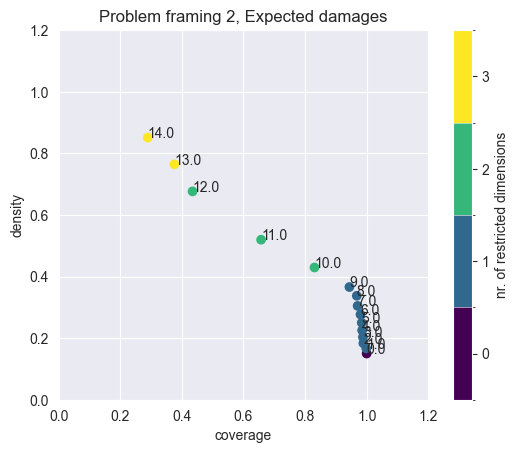

In [10]:
# Show trade-off between density and coverage
box.show_tradeoff(annotated=True)
plt.title("Problem framing 2, Expected damages")
plt.savefig('./images/prim_problem2_damages_tradeoff.png')
plt.show()

In [11]:
# Determine point to study, depends on: 
# (1) maximise density
# (2) maximise coverage
# (3) minimise number of restricted dimensions
point_to_study = 11

In [12]:
box.inspect(point_to_study)

coverage      0.657333
density       0.519494
id           11.000000
k           493.000000
mass          0.189800
mean          0.519494
n           949.000000
res_dim       2.000000
Name: 11, dtype: float64

                     box 11                                        
                        min         max      qp value      qp value
A.1_pfail          0.000178    0.386992           NaN  1.179780e-97
discount rate 2  {1.5, 2.5}  {1.5, 2.5}  4.216623e-22           NaN



/Users/milanmoleman/PycharmProjects/EPA141A-labs/venv/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{1.5, 2.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]
/Users/milanmoleman/PycharmProjects/EPA141A-labs/venv/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{1.5, 2.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]


[None]

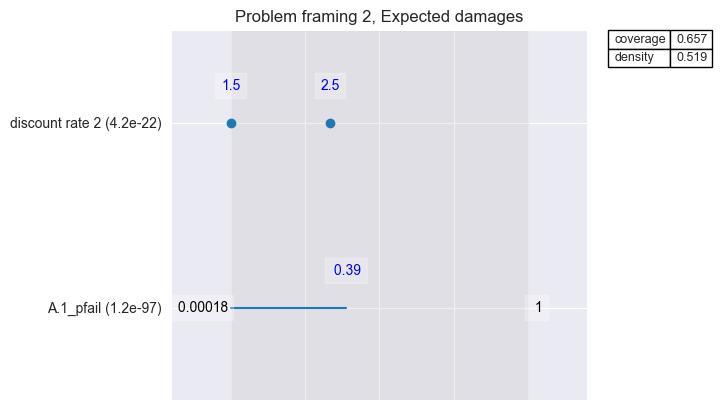

In [13]:
box.inspect(point_to_study, style='graph')
plt.title("Problem framing 2, Expected damages")
plt.savefig('./images/prim_problem2_damages_sensitivity.png', bbox_inches='tight')
plt.show()

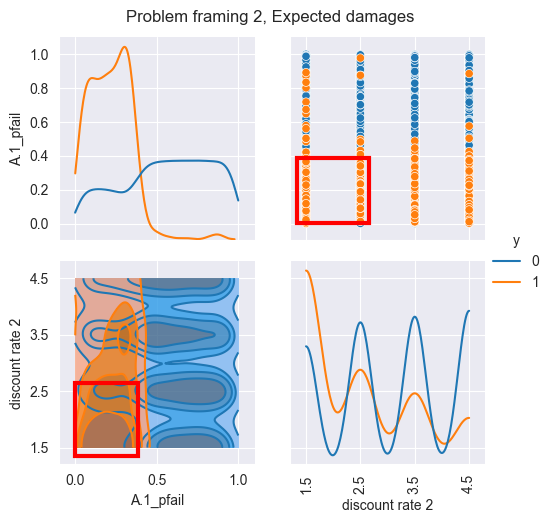

In [14]:
box.show_pairs_scatter(point_to_study)
plt.suptitle("Problem framing 2, Expected damages", y=1.02)
plt.savefig('./images/prim_problem2_damages_sensitivity_detailed.png', bbox_inches='tight')
plt.show()

In [15]:
# Define outcome to study
y = dep_var(df=outcomes, outcome_to_study='Expected Number of Deaths')

The threshold for 85% worst outcomes for Expected Number of Deaths equals 2.581666075302055.


In [16]:
# Define PRIM
sd_alg = prim.Prim(x=X, y=y, threshold=0.8, peel_alpha=0.1)

In [17]:
# Find box
box = sd_alg.find_box()

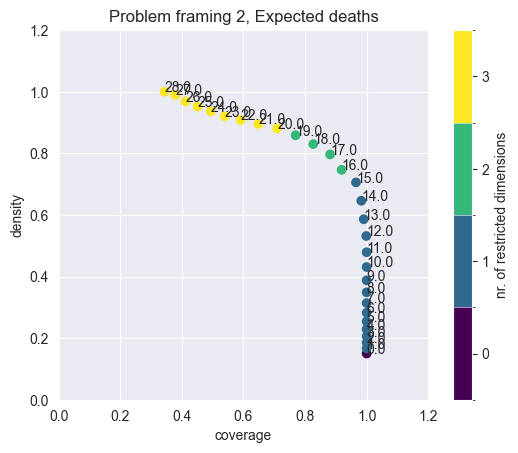

In [18]:
# Show trade-off between coverage and density
box.show_tradeoff(annotated=True)
plt.title("Problem framing 2, Expected deaths")
plt.savefig('./images/prim_problem2_deaths_tradeoff.png')
plt.show()

In [19]:
# Determine point to study
point_to_study = 18

In [20]:
box.inspect(point_to_study)

coverage      0.826667
density       0.829987
id           18.000000
k           620.000000
mass          0.149400
mean          0.829987
n           747.000000
res_dim       2.000000
Name: 18, dtype: float64

             box 18                                 
                min       max      qp value qp value
A.3_pfail  0.000090  0.184842           NaN      0.0
A.1_pfail  0.195909  0.999961  1.053799e-09      NaN



[None]

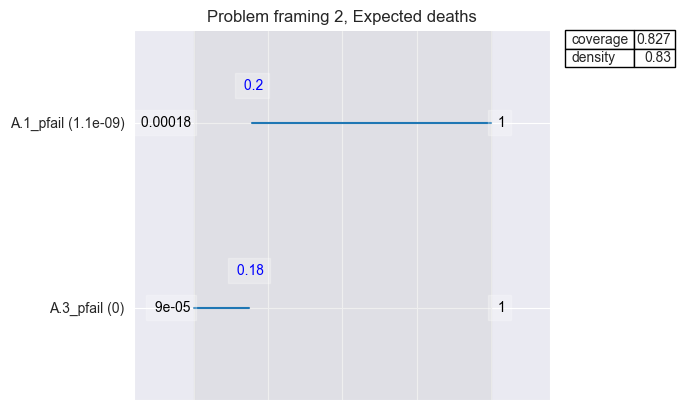

In [21]:
box.inspect(point_to_study, style='graph')
plt.title("Problem framing 2, Expected deaths")
plt.savefig('./images/prim_problem2_deaths_sensitivity.png', bbox_inches='tight')
plt.show()

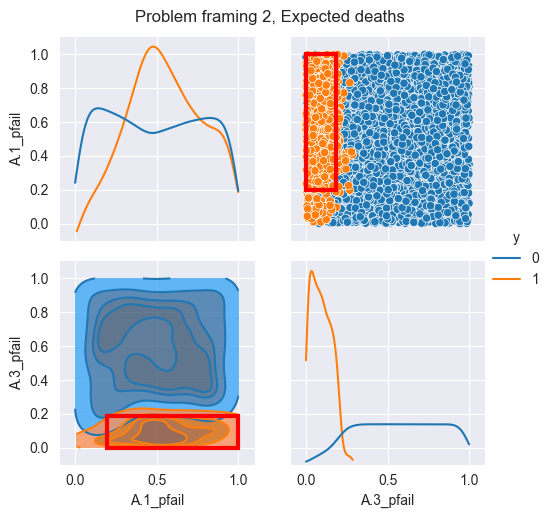

In [22]:
box.show_pairs_scatter(point_to_study)
plt.suptitle("Problem framing 2, Expected deaths", y=1.02)
plt.savefig('./images/prim_problem2_deaths_sensitivity_detailed.png', bbox_inches='tight')
plt.show()

### Problem Framing 3

In [7]:
experiments, outcomes = load_results('./results/prim_problem3.tar.gz')

In [8]:
outcomes.keys()

dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])

In [9]:
X = experiments.iloc[:, 0:(len(experiments.columns)-3)]

In [38]:
y = dep_var(df=outcomes, outcome_to_study='A.3_Expected Number of Deaths', percentile=80)

The threshold for 80% worst outcomes for A.3_Expected Number of Deaths equals 1.4472162872750578.


In [39]:
y

array([0, 0, 1, ..., 1, 0, 1])

In [40]:
sd_alg = prim.Prim(x=X, y=y, threshold=0.8, peel_alpha=0.1)

In [41]:
box = sd_alg.find_box()

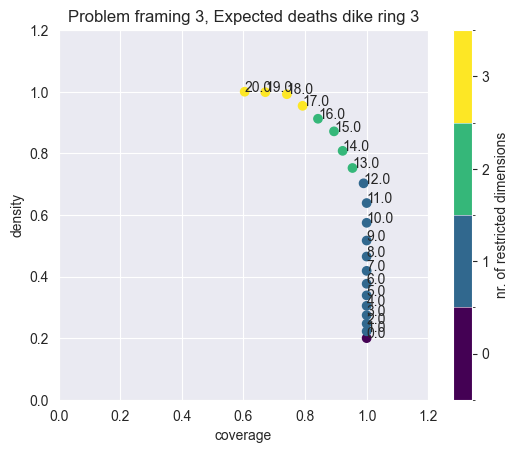

In [42]:
box.show_tradeoff(annotated=True)
plt.title("Problem framing 3, Expected deaths dike ring 3")
plt.savefig('./images/prim_problem3_a3deaths_tradeoff.png')
plt.show()

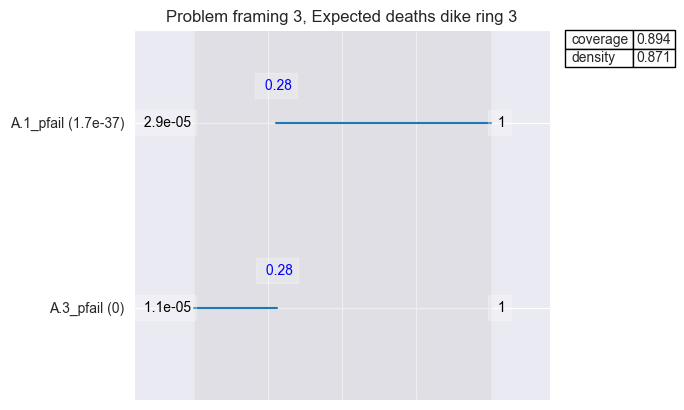

In [43]:
# Determine point to study
point_to_study = 15
box.inspect(point_to_study, style='graph')
plt.title("Problem framing 3, Expected deaths dike ring 3")
plt.savefig('./images/prim_problem3_a3deaths_sensitivity.png', bbox_inches='tight')
plt.show()

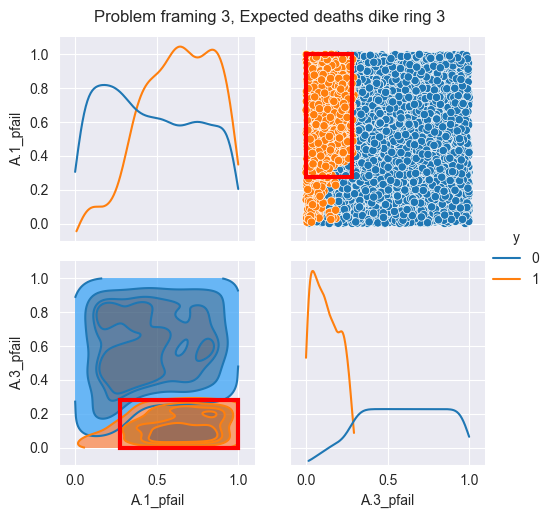

In [44]:
box.show_pairs_scatter(point_to_study)
plt.suptitle("Problem framing 3, Expected deaths dike ring 3", y=1.02)
plt.savefig('./images/prim_problem3_a3deaths_sensitivity_detailed.png', bbox_inches='tight')
plt.show()

In [57]:
y = dep_var(df=outcomes, outcome_to_study='A.3 Total Costs')

The threshold for 85% worst outcomes for A.3 Total Costs equals 1115202038.4806004.


In [58]:
sd_alg = prim.Prim(x=X, y=y, threshold=0.8, peel_alpha=0.1)

In [59]:
box = sd_alg.find_box()

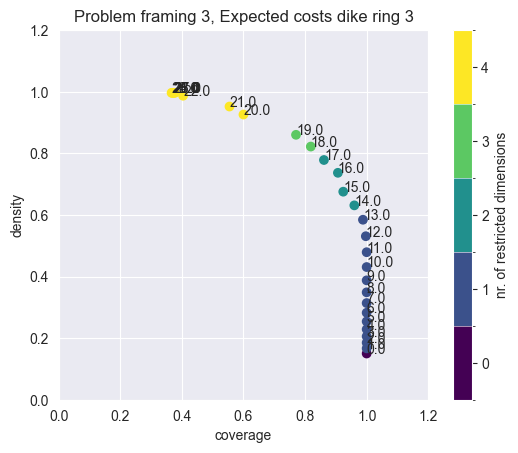

In [60]:
box.show_tradeoff(annotated=True)
plt.title("Problem framing 3, Expected costs dike ring 3")
plt.savefig('./images/prim_problem3_a3costs_tradeoff.png')
plt.show()

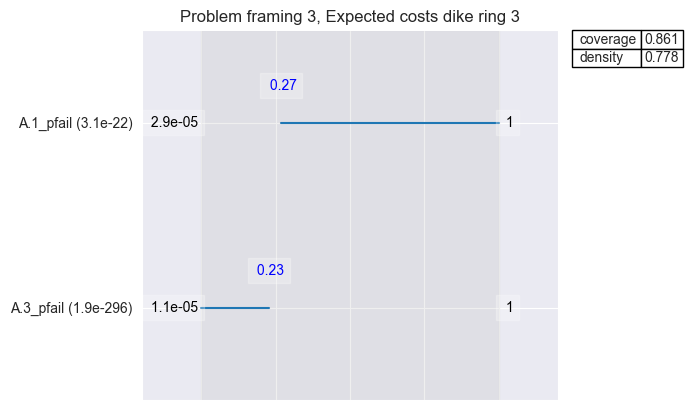

In [61]:
# Determine point to study
point_to_study = 17
box.inspect(point_to_study, style='graph')
plt.title("Problem framing 3, Expected costs dike ring 3")
plt.savefig('./images/prim_problem3_a3costs_sensitivity.png', bbox_inches='tight')
plt.show()

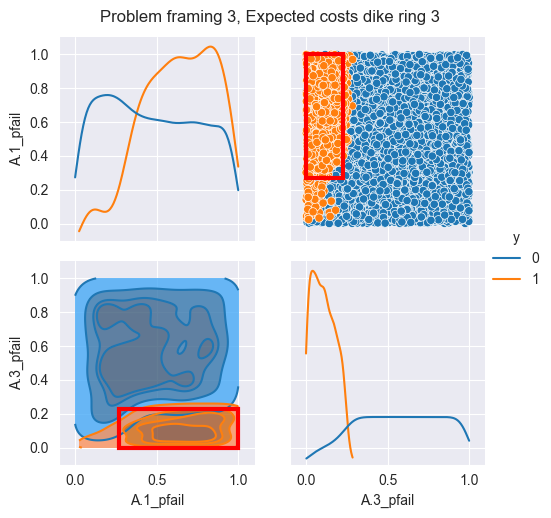

In [62]:
box.show_pairs_scatter(point_to_study)
plt.suptitle("Problem framing 3, Expected costs dike ring 3", y=1.02)
plt.savefig('./images/prim_problem3_a3costs_sensitivity_detailed.png', bbox_inches='tight')
plt.show()

## Scenario Discovery for Directed Search

### Dike Ring 1 

In [10]:
experiments, outcomes = load_results('./results/prim_problem3.tar.gz')

In [11]:
outcomes.keys()

dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])

In [12]:
X = experiments.iloc[:, 0:(len(experiments.columns)-3)]

In [46]:
y1 = dep_var(df=outcomes, outcome_to_study='A.1_Expected Number of Deaths', percentile=75)

The threshold for 75% worst outcomes for A.1_Expected Number of Deaths equals 1.3446359659288225.


In [47]:
sd_alg_1 = prim.Prim(x=X, y=y1, threshold=0.8, peel_alpha=0.1)

In [48]:
box1 = sd_alg_1.find_box()

/Users/milanmoleman/PycharmProjects/EPA141A-labs/venv/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
/Users/milanmoleman/PycharmProjects/EPA141A-labs/venv/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
/Users/milanmoleman/PycharmProjects/EPA141A-labs/venv/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Va

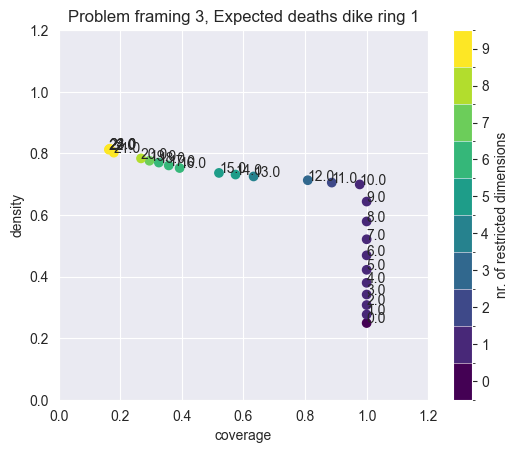

In [49]:
box1.show_tradeoff(annotated=True)
plt.title("Problem framing 3, Expected deaths dike ring 1")
plt.show()

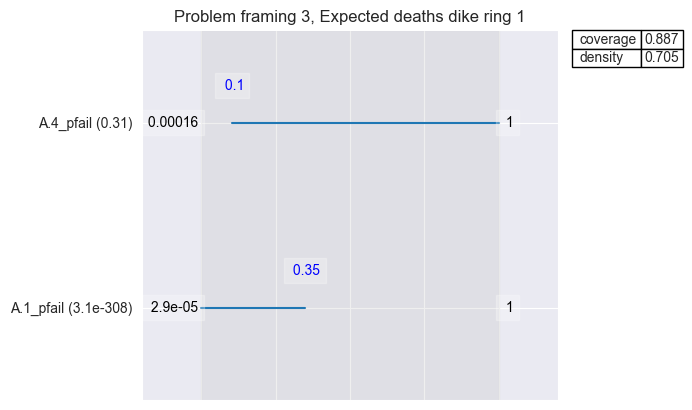

In [50]:
# Determine point to study
point_to_study = 11
box1.inspect(point_to_study, style='graph')
plt.title("Problem framing 3, Expected deaths dike ring 1")
plt.show()

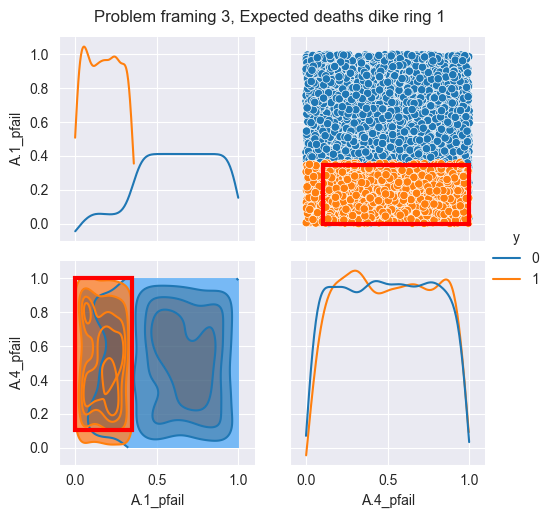

In [51]:
box1.show_pairs_scatter(point_to_study)
plt.suptitle("Problem framing 3, Expected deaths dike ring 1", y=1.02)
plt.show()

In [56]:
# extract indices which satisfy the identified box
indices = box1.yi

In [58]:
# filter experiments based on indices
exp_filtered_a1 = experiments.iloc[indices]

In [59]:
exp_filtered_a1

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
23,66,220.340347,1.5,0.277751,317.625580,1.0,0.246968,114.478228,10.0,0.552078,...,0,0,0,0,0,0,0,23,Policy 0,dikesnet
40,39,287.676115,1.0,0.093811,246.091351,1.5,0.271764,101.893796,1.0,0.429600,...,0,0,0,0,0,0,0,40,Policy 0,dikesnet
65,50,106.756807,10.0,0.345841,333.340514,1.5,0.745971,82.951536,1.0,0.469837,...,0,0,0,0,0,0,0,65,Policy 0,dikesnet
125,76,56.356797,1.5,0.189130,196.888090,10.0,0.057171,280.790547,1.5,0.470550,...,0,0,0,0,0,0,0,125,Policy 0,dikesnet
155,132,298.587312,1.5,0.000580,156.903324,1.5,0.970702,232.692672,10.0,0.575071,...,0,0,0,0,0,0,0,155,Policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,17,318.704216,1.5,0.316925,82.543210,1.5,0.608445,99.930311,1.0,0.313661,...,0,0,0,0,0,0,0,4961,Policy 0,dikesnet
4974,14,42.383719,1.5,0.269940,78.055294,1.5,0.729947,113.363425,1.0,0.624821,...,0,0,0,0,0,0,0,4974,Policy 0,dikesnet
4980,60,169.358709,1.0,0.181088,75.754849,1.0,0.318613,262.908765,1.5,0.555394,...,0,0,0,0,0,0,0,4980,Policy 0,dikesnet
4989,67,307.415332,1.5,0.187421,301.777368,1.0,0.945808,61.394466,1.5,0.250631,...,0,0,0,0,0,0,0,4989,Policy 0,dikesnet


In [60]:
experiments['A.1_pfail'].describe()

count    5000.000000
mean        0.500000
std         0.288702
min         0.000029
25%         0.250104
50%         0.499986
75%         0.749916
max         0.999857
Name: A.1_pfail, dtype: float64

In [61]:
exp_filtered_a1['A.1_pfail'].describe()

count    254.000000
mean       0.159291
std        0.100359
min        0.000580
25%        0.071480
50%        0.158310
75%        0.242800
max        0.347504
Name: A.1_pfail, dtype: float64

### Dike Ring 2

In [62]:
y2 = dep_var(df=outcomes, outcome_to_study='A.2_Expected Number of Deaths', percentile=75)

The threshold for 75% worst outcomes for A.2_Expected Number of Deaths equals 0.1405833342214674.


In [63]:
sd_alg_2 = prim.Prim(x=X, y=y2, threshold=0.8, peel_alpha=0.1)

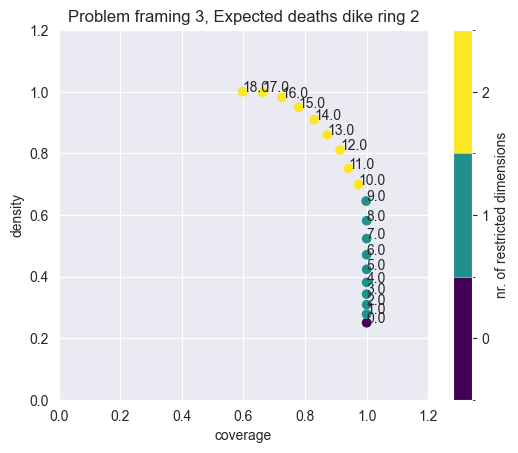

In [65]:
box2 = sd_alg_2.find_box()
box2.show_tradeoff(annotated=True)
plt.title("Problem framing 3, Expected deaths dike ring 2")
plt.show()

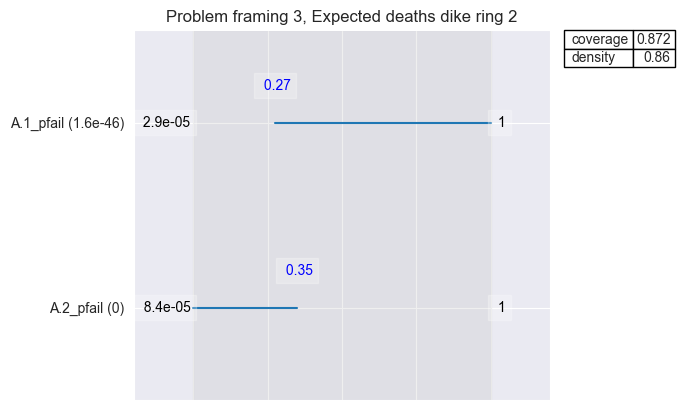

In [67]:
point_to_study = 13
box2.inspect(point_to_study, style='graph')
plt.title("Problem framing 3, Expected deaths dike ring 2")
plt.show()

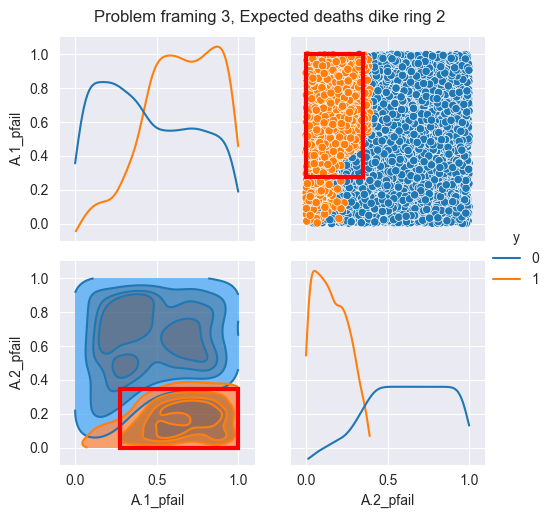

In [68]:
box2.show_pairs_scatter(point_to_study)
plt.suptitle("Problem framing 3, Expected deaths dike ring 2", y=1.02)
plt.show()

In [69]:
# extract indices which satisfy the identified box
indices2 = box2.yi
# filter experiments based on indices
exp_filtered_a2 = experiments.iloc[indices2]

### Dike Ring 3

In [70]:
y3 = dep_var(df=outcomes, outcome_to_study='A.3_Expected Number of Deaths', percentile=75)

The threshold for 75% worst outcomes for A.3_Expected Number of Deaths equals 0.9881257469735628.


In [71]:
sd_alg_3 = prim.Prim(x=X, y=y3, threshold=0.8, peel_alpha=0.1)

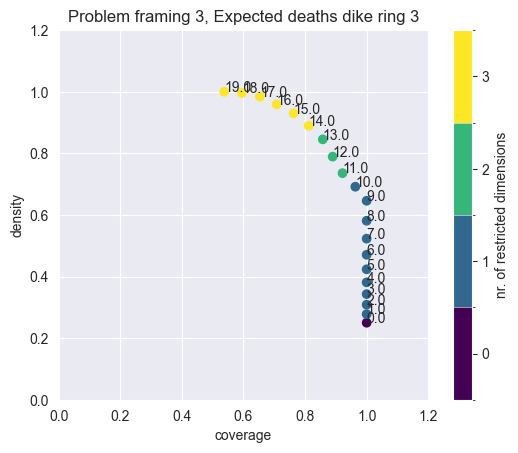

In [72]:
box3 = sd_alg_3.find_box()
box3.show_tradeoff(annotated=True)
plt.title("Problem framing 3, Expected deaths dike ring 3")
plt.show()

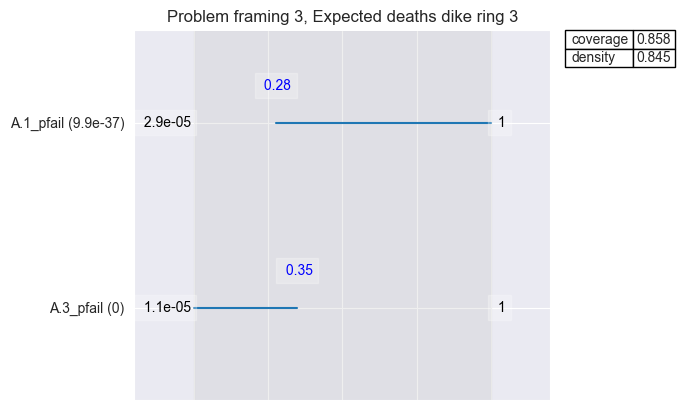

In [73]:
point_to_study = 13
box3.inspect(point_to_study, style='graph')
plt.title("Problem framing 3, Expected deaths dike ring 3")
plt.show()

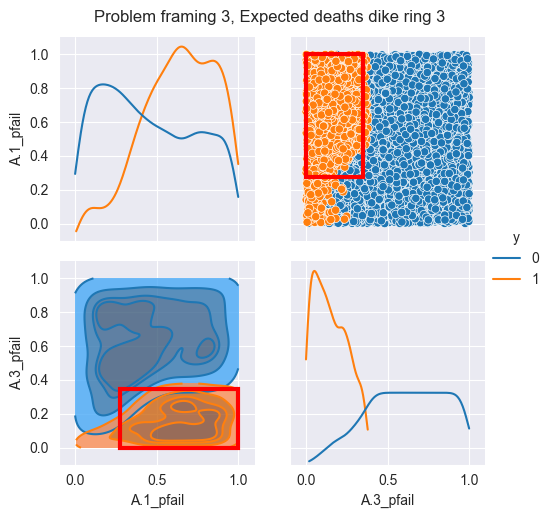

In [74]:
box3.show_pairs_scatter(point_to_study)
plt.suptitle("Problem framing 3, Expected deaths dike ring 3", y=1.02)
plt.show()

In [75]:
# extract indices which satisfy the identified box
indices3 = box3.yi
# filter experiments based on indices
exp_filtered_a3 = experiments.iloc[indices3]

### Merge filtered experiment dataframes

In [76]:
scenarios = pd.concat([exp_filtered_a1, exp_filtered_a2, exp_filtered_a3])

In [77]:
scenarios

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
23,66,220.340347,1.5,0.277751,317.625580,1.0,0.246968,114.478228,10.0,0.552078,...,0,0,0,0,0,0,0,23,Policy 0,dikesnet
40,39,287.676115,1.0,0.093811,246.091351,1.5,0.271764,101.893796,1.0,0.429600,...,0,0,0,0,0,0,0,40,Policy 0,dikesnet
65,50,106.756807,10.0,0.345841,333.340514,1.5,0.745971,82.951536,1.0,0.469837,...,0,0,0,0,0,0,0,65,Policy 0,dikesnet
125,76,56.356797,1.5,0.189130,196.888090,10.0,0.057171,280.790547,1.5,0.470550,...,0,0,0,0,0,0,0,125,Policy 0,dikesnet
155,132,298.587312,1.5,0.000580,156.903324,1.5,0.970702,232.692672,10.0,0.575071,...,0,0,0,0,0,0,0,155,Policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,7,320.950831,1.5,0.533701,300.887555,1.0,0.992886,134.842915,1.0,0.166615,...,0,0,0,0,0,0,0,4973,Policy 0,dikesnet
4976,49,260.621182,1.5,0.756180,245.847333,1.5,0.588074,146.423040,1.0,0.140686,...,0,0,0,0,0,0,0,4976,Policy 0,dikesnet
4985,35,258.320169,1.0,0.842552,57.433710,10.0,0.934111,43.060722,1.0,0.087416,...,0,0,0,0,0,0,0,4985,Policy 0,dikesnet
4995,7,214.350166,10.0,0.476040,56.400380,1.0,0.254759,342.798011,1.0,0.005934,...,0,0,0,0,0,0,0,4995,Policy 0,dikesnet


In [79]:
scenarios.scenario.unique()

[23, 40, 65, 125, 155, ..., 4966, 4967, 4973, 4976, 4985]
Length: 1551
Categories (5000, int64): [0, 1, 2, 3, ..., 4996, 4997, 4998, 4999]

In [80]:
duplicates = scenarios.duplicated().value_counts()

In [81]:
duplicates

False    1551
True      122
Name: count, dtype: int64

In [82]:
scenarios_drop = scenarios.drop_duplicates()

In [83]:
scenarios_drop

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
23,66,220.340347,1.5,0.277751,317.625580,1.0,0.246968,114.478228,10.0,0.552078,...,0,0,0,0,0,0,0,23,Policy 0,dikesnet
40,39,287.676115,1.0,0.093811,246.091351,1.5,0.271764,101.893796,1.0,0.429600,...,0,0,0,0,0,0,0,40,Policy 0,dikesnet
65,50,106.756807,10.0,0.345841,333.340514,1.5,0.745971,82.951536,1.0,0.469837,...,0,0,0,0,0,0,0,65,Policy 0,dikesnet
125,76,56.356797,1.5,0.189130,196.888090,10.0,0.057171,280.790547,1.5,0.470550,...,0,0,0,0,0,0,0,125,Policy 0,dikesnet
155,132,298.587312,1.5,0.000580,156.903324,1.5,0.970702,232.692672,10.0,0.575071,...,0,0,0,0,0,0,0,155,Policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,89,46.645355,1.0,0.751029,277.455225,1.5,0.606332,204.774335,10.0,0.012546,...,0,0,0,0,0,0,0,4966,Policy 0,dikesnet
4967,62,52.666623,1.0,0.866610,52.132103,10.0,0.671048,73.254758,10.0,0.217036,...,0,0,0,0,0,0,0,4967,Policy 0,dikesnet
4973,7,320.950831,1.5,0.533701,300.887555,1.0,0.992886,134.842915,1.0,0.166615,...,0,0,0,0,0,0,0,4973,Policy 0,dikesnet
4976,49,260.621182,1.5,0.756180,245.847333,1.5,0.588074,146.423040,1.0,0.140686,...,0,0,0,0,0,0,0,4976,Policy 0,dikesnet
